In [1]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
from numpy import geomspace
import math
import matplotlib
from cycler import cycler
matplotlib.rcParams['axes.prop_cycle'] = cycler(color='brgmcyk')

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to JupyROOT 6.14/04
../InputData/zT_Rebin_8_006zT06zT/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_8_006zT06zT/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_8_006zT06zT/pPb_SE_L0_Correlation_GMB_Ratio.root
../InputData/zT_Rebin_8_006zT06zT/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_8_006zT06zT/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_8_006zT06zT/pPb_SE_L0_Correlation_GMB_Ratio.root


In [2]:
print ZYAM_Min_i
print dPhi_Bins[ZYAM_Min_i]
print ZYAM_Max_i
print dPhi_Bins[ZYAM_Max_i]
print(pTbins)
print(delta_phi_centers)
print(dphi_start_integral)

2
0.392699081699
8
1.57079632679
[12, 40]
[0.09817477042468103, 0.2945243112740431, 0.4908738521234052, 0.6872233929727672, 0.8835729338221293, 1.0799224746714913, 1.2762720155208536, 1.4726215563702154, 1.6689710972195777, 1.8653206380689396, 2.061670178918302, 2.2580197197676637, 2.454369260617026, 2.6507188014663883, 2.84706834231575, 3.043417883165112]
14


In [3]:
print pTbins
print zTbins

[12, 40]
[0.06  0.08  0.107 0.142 0.19  0.253 0.337 0.45  0.6  ]


**root to numpy**

In [4]:
Corrs = ROOT_to_nparray()
#print(Corrs["p-Pb_Uncorr_Estimate"][0][1])
#Plot_UB_Subtraction(Corrs)
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [5]:
reload(functions_correlations)
import functions_correlations
from functions_correlations import *

In [6]:
#Plot_Sub_UB_Overlay(Corrs)

In [7]:
Correlated_Subtraction_Weights(Corrs)
#print_from_Dict(Corrs)

In [8]:
#Plot_UB()

**Pedestal Subtraction**

In [9]:
#print_from_Dict(Corrs)
#print(Corrs["pp_CSR"][0])
Plot = False
if Plot:
    for ipt in range(N_pT_Bins):
        for izt in range(NzT):
            fig = plt.figure(figsize=(8,7))
            #Cs_Correlations_Unsub_Overlay(delta_phi_centers, Corrs["pp_CSR"][0][izt],  Corrs["pp_CSR_Errors"][0][izt],UE_binmin=2, UE_binmax=9,label='data',color='black')
            GetRatio(Corrs["pp_CSR"][0][izt],Corrs["pp_CSR_Errors"][0][izt],Corrs["p-Pb_CSR"][0][izt],Corrs["p-Pb_CSR_Errors"][0][izt],delta_phi_centers)
            plt.annotate(r'%1.2f < $z_\mathrm{T}$ < %1.2f'%(zTbins[izt],zTbins[izt+1]), xy=(0.99, 0.01), xycoords='axes fraction', ha='right', va='bottom', fontsize=16)

            plt.savefig('pics/%s/%s/Befor_After_UE_pp-pPb_pT_%i_zT_%i.pdf'%(Shower,description_string,ipt,izt))

In [10]:
Ped_Sub_After_Cs(Corrs)

In [11]:
#Plot_pp_pPb_Cs(Corrs)
#Plot_pp_pPb_Cs_Individual(Corrs)
#Compare_Cs_pTBins()

**Debugging**

In [12]:
print("Number of Away side bins = %i"%(N_Phi_Integrate))

print(Corrs['pp_CSR'][0][3])

for SYS in Systems:
    print(SYS)
    vals = Corrs['%s_CSR'%(SYS)][0][3][-N_Phi_Integrate:] #2nd zT bin
    Integral = np.sum(vals)/(dPhi_Width*N_Phi_Integrate)

    val_errors = Corrs['%s_CSR_Errors'%(SYS)][0][3][-N_Phi_Integrate:]
    Integral_Err = math.sqrt(np.sum(val_errors**2))/(dPhi_Width*N_Phi_Integrate)

    UE_Error = Corrs['%s_Uncorr_Error'%(SYS)][0][3][1]/(dPhi_Width*(ZYAM_Max_i-ZYAM_Min_i)) #is a scalar

    print("%f +\- %f +\- %f"%(Integral,Integral_Err,UE_Error))
    Total_Err = math.sqrt(Integral_Err**2 + UE_Error**2)
    print(Total_Err/Integral)
    
    print("non-dphi rate %1.3f"%(Corrs['%s_Uncorr_Error'%(SYS)][0][3][1]))

Number of Away side bins = 2
[-0.005929    0.05211051 -0.02312163 -0.0167275   0.01133097 -0.00963355
  0.00887227  0.02927943  0.00281122 -0.00324333  0.03185555  0.02654528
  0.05619483  0.10300581  0.10079016  0.04795915]
pp
0.378787 +\- 0.105185 +\- 0.040112
0.29719641879101416
non-dphi rate 0.047
p-Pb
0.606076 +\- 0.097851 +\- 0.042454
0.1759900442891115
non-dphi rate 0.050


**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

/Users/fernando/Library/Python/2.7/lib/python/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


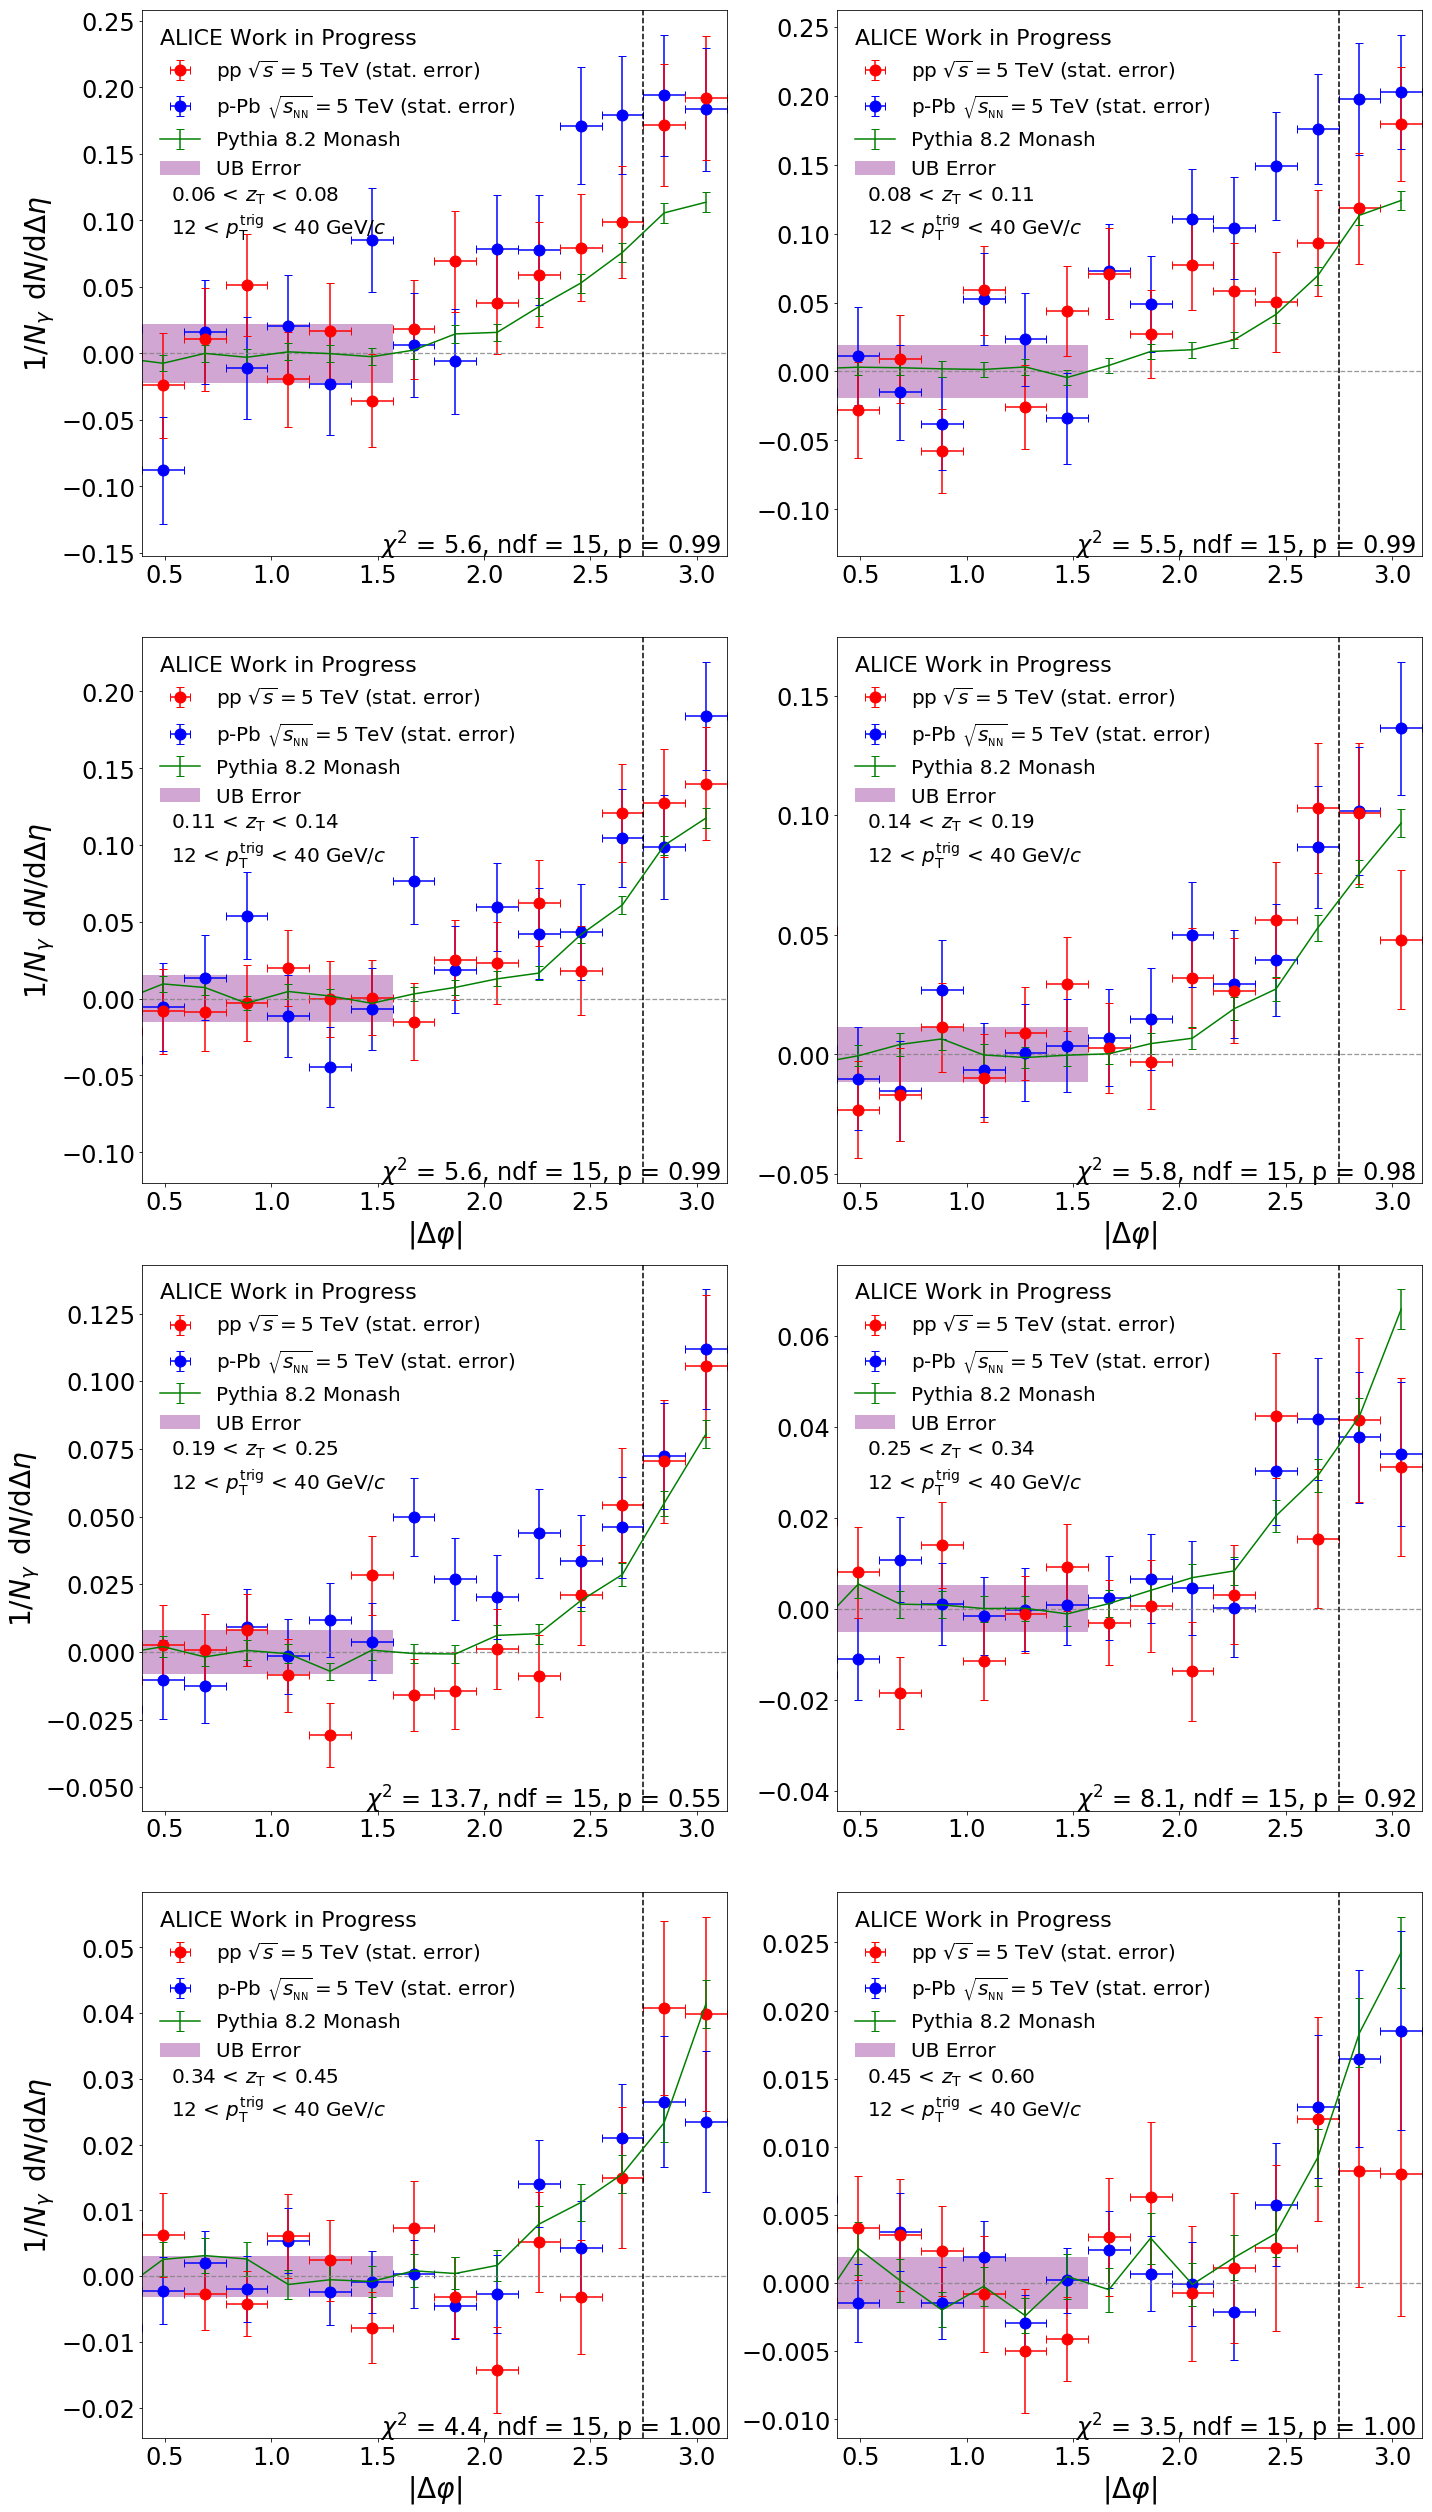

In [13]:
Avg_Corr = Cs_Weighted_Average(Corrs)
Plot_pp_pPb_Cs(Avg_Corr)
#Plot_pp_pPb_Cs_Individual(Avg_Corr)

In [14]:
reload(functions_correlations)
from functions_correlations import *

In [15]:
Frags = Get_Fragmentation(Corrs)
print Frags.keys()
LaTeX_Results_Summary(Frags)
LaTeX_Ratio_Systematics(Frags)
#print(Frags["pp_FF_Errors"][0])
#print(Frags["pp_purity_FF_Errors"])
#for i in range(len(Frags["pp_FF"][0])):
#    print("%f"%(Frags["pp_FF_Errors"][0][i]/Frags["pp_FF"][0][i])),

['pp_purity_FF_Errors', 'p-Pb_FF_Errors', 'pp_FF_Errors', 'p-Pb_UE_FF_Errors', 'pp_FF', 'p-Pb_FF', 'pp_UE_FF_Errors', 'p-Pb_purity_FF_Errors']
[[0.76084074 0.48465824 0.29429373 0.16408278 0.08842321 0.04398451
  0.02105448 0.01057824]]
                        LaTeX Table
Source   &  pp data & p--Pb~data  \\
Statistical Uncertainty & 20\%-85\% & 16\%-32\% \\
\hline
Purity & 12\%-12\% & 12\%-12\% \\
UE & 6\%-20\% & 6\%-10\% \\
Tracking Efficiency &  5\% & 5\%  \\ 
pp


$\zt$ interval  & Statistics  & UE Estimate  & Purity   & Tracking Efficiency \\
\hline
0.06 - 0.08 & 28\% & 12\% & 17\% & 7\%\\
0.08 - 0.11 & 27\% & 11\% & 17\% & 7\%\\
0.11 - 0.14 & 28\% & 11\% & 17\% & 7\%\\
0.14 - 0.19 & 35\% & 13\% & 17\% & 7\%\\
0.19 - 0.25 & 27\% & 9\% & 17\% & 7\%\\
0.25 - 0.34 & 49\% & 14\% & 17\% & 7\%\\
0.34 - 0.45 & 40\% & 10\% & 17\% & 7\%\\
0.45 - 0.60 & 90\% & 20\% & 17\% & 7\%\\
p-Pb


$\zt$ interval  & Statistics  & UE Estimate  & Purity   & Tracking Efficiency \\
\hline
0.06 - 0.08 & 28\

In [16]:
reload(functions_fragmentation)
from functions_fragmentation import *

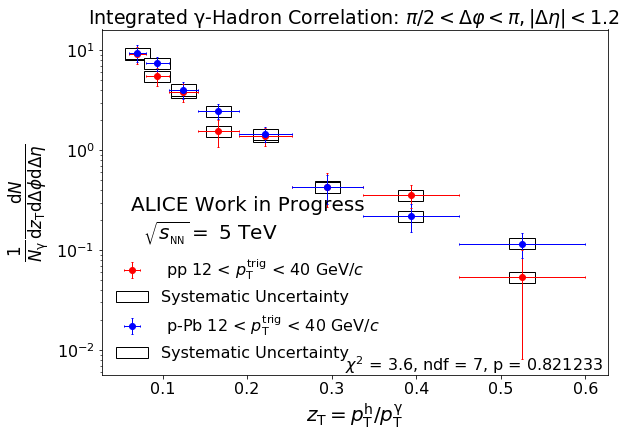

                    pp Central Values:
[9.08907664 5.52365313 3.81826941 1.549472   1.39651633 0.43246254
 0.35671339 0.05420313]

                    pp Stat. Uncertainty:
[1.80845151 1.17417879 0.78224031 0.46049753 0.28848144 0.16377149
 0.09021569 0.04611464]

              pp Systematic Uncertainty:
[1.16737085 0.70943968 0.49040586 0.19900904 0.17936392 0.05554405
 0.04581509 0.00696167]

                    p-Pb Central Values:
[9.43882971 7.42242595 4.03543255 2.47922355 1.46275439 0.42699818
 0.22120374 0.11669755]

                    p-Pb Stat. Uncertainty:
[1.81113886 1.19066518 0.76781593 0.43631866 0.2511398  0.13455524
 0.06735066 0.03327987]

              p-Pb Systematic Uncertainty:
[1.21229198 0.95331177 0.51829757 0.31842325 0.18787132 0.05484223
 0.02841067 0.01498825]

                        LaTeX Table
Source   &  pp data & \pPb~data  \\
Statistical Uncertainty & 20\%-85\% & 16\%-32\% \\
\hline
Purity & 12\%-12\% & 12\%-12\% \\
Tracking Efficiency &  5\% & 5\%  

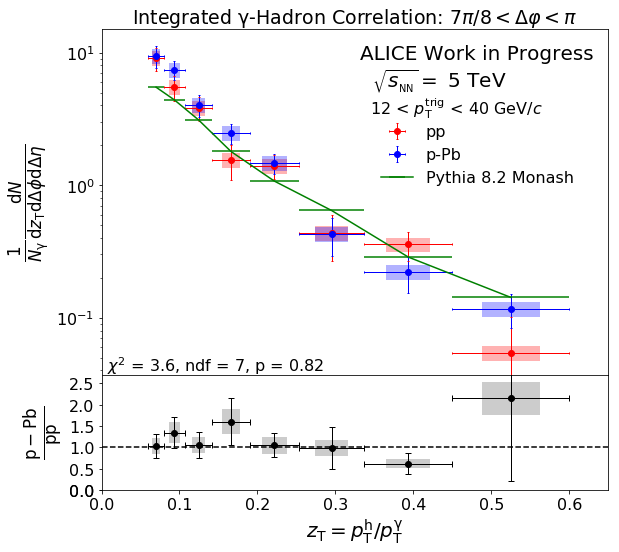

pp_purity_FF_Errors:
1.0753, 0.6535, 0.4517, 0.1833, 0.1652, 0.0512, 0.0422, 0.0064, 

p-Pb_FF_Errors:
1.8111, 1.1907, 0.7678, 0.4363, 0.2511, 0.1346, 0.0674, 0.0333, 

pp_FF_Errors:
1.8085, 1.1742, 0.7822, 0.4605, 0.2885, 0.1638, 0.0902, 0.0461, 

p-Pb_UE_FF_Errors:
0.7945, 0.5133, 0.3194, 0.1737, 0.0913, 0.0437, 0.0178, 0.0070, 

pp_FF:
9.0891, 5.5237, 3.8183, 1.5495, 1.3965, 0.4325, 0.3567, 0.0542, 

p-Pb_FF:
9.4388, 7.4224, 4.0354, 2.4792, 1.4628, 0.4270, 0.2212, 0.1167, 

pp_UE_FF_Errors:
0.7608, 0.4847, 0.2943, 0.1641, 0.0884, 0.0440, 0.0211, 0.0106, 

p-Pb_purity_FF_Errors:
1.1167, 0.8781, 0.4774, 0.2933, 0.1731, 0.0505, 0.0262, 0.0138, 



In [17]:
Combined_Frags = Average_FF(Frags)
Plot_pp_pPb_Avg_FF(Combined_Frags)

print(Combined_Frags.keys())

Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
print_from_Dict(Frags)


printthis = False
if printthis == True:
    print("zT Centers:")
    for izt in zT_centers:
        print("%1.2f,"%(izt)),
    print("")

    print("zT Widths:")
    for izt in zT_widths:
        print("%1.4f,"%(izt)),

#Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
#print_from_Dict(Frags_Avg_Cs)
#Plot_pp_pPb_Avg_FF_and_Ratio(Frags_Avg_Cs)

In [18]:
a = 730/521
a = 0.0730/0.0521
print(1.0/a)
7.7810
b = 1.1465/7.7810
print(b)

0.713698630137
0.147346099473


In [20]:
#LaTeX_Table(Combined_Frags)

 [0.2340184  0.19214434 0.15565145 0.12918354 0.11959303 0.130651
 0.15808215 0.19509828 0.23725472 0.2822576  0.32894071 0.37667987
 0.42511944 0.47404478 0.52331964 0.57285385 0.6225855  0.6724708
 0.72247791 0.77258318]
0.975213381477


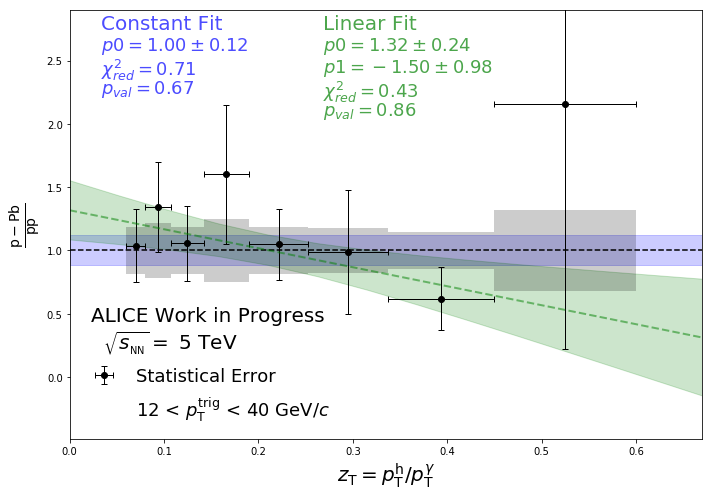

                Central Values:
[1.03848059 1.34375309 1.05687476 1.60004412 1.04743093 0.98736455
 0.62011615 2.15296677]

                Satistical Uncertainty Absolute:
[0.28705596 0.35785246 0.29549607 0.5526484  0.28134668 0.48643118
 0.24544895 1.93185445]

               Relative Satistical Uncertainty:
[0.27641918 0.2663082  0.27959421 0.34539573 0.26860642 0.49265611
 0.39581125 0.89729878]

                Ratio Uncertainty from Purity:
[0.17055742 0.1981619  0.17213156 0.22322112 0.17132173 0.16625434
 0.13920507 0.28083995]

                Ratio Uncertainty from Single Track Efficiency:
[0.07343167 0.09501769 0.07473233 0.1131402  0.07406455 0.06981722
 0.04384883 0.15223774]

                Full Systematic Uncertainty:
[0.18569342 0.21976465 0.18765445 0.25025662 0.1866459  0.18031902
 0.14594784 0.3194486 ]

                LaTeX Table:
$\zt$ range & pp & p--Pb & p--Pb/pp \\
0.06 - 0.08 & 9.089 $\pm$ 1.808 & 9.439 $\pm$ 1.811 & 1.038 $\pm$ 0.287 \\
0.08 - 0.11 & 5.524 

In [21]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
#pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

### Compare Different Integrations

In [ ]:
ranges = (1.9,2.15,2.7)
strings = ("11\pi/16, \mathrm{R} = 1.0","3\pi/4,\mathrm{R} = 0.8","7\pi/8, \mathrm{R} = 0.4","15\pi/16, \mathrm{R} = 0.2")

Compare_FF_Integration(ranges,strings)

In [ ]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [ ]:
reload(functions_correlations)
import functions_correlations
from functions_correlations import *

In [ ]:
save_name = "Beam_Flip"
strings = ["zT_Rebin_8_006zT06zTpPb","zT_Rebin_8_006zT06zTPbp","zT_Rebin_8_006zT06zT"]
string_descriptions = ["p--Pb","Pb--p","Combined"]
colors = ["red","green","black"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

In [ ]:
save_name = "Beam_Flip"
strings = ["zT_Rebin_8_006zT06zTOldBinNewNewPurity","pT_Rebin_2_006zT06zTOldBinNewNewPurity"]
string_descriptions = ["1 pT Bins","2 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

In [ ]:
save_name = "zT_Comparison"
strings = ["zT_Rebin_8_006zT06zTOldBinNewNewPurity","zT_Rebin_7_006zT06zT","zT_Rebin_9_006zT06zT"]
string_descriptions = ["8 pT Bins [Default]","7 zT Bins", "9zT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

In [ ]:
save_name = "ZYAM_Variation"
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam"]
string_descriptions = ["Default","Smaller ZYAM Avg Range"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

In [ ]:
strings = ["zT_Rebin_7_006zT06zT","zT_Rebin_8_006zT06zT","zT_Rebin_9_006zT06zT"]
string_descriptions = ["7 zT Bins","8 zT Bins","9 zT Bins","4 pT Bins"]

strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTOldBinNewNewPurity"]
string_descriptions = ["Old","New"]

colors = ["red","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

## Compare Different pT Binning

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE"]
string_descriptions = ["1 pT Bins","2 pT Bins","3 pT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
#Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,True)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [ ]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

In [ ]:
reload(functions_fragmentation)
from functions_fragmentation import *
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTpT2"]
string_descriptions = ["1 pT Bin","2 pT Bins"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus","pT_Rebin_1_90p"]
string_descriptions = ["Cetral Purity","Purity Plus STDV","Purity Minus STDV","purity = 90%"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,False)